In [321]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import nltk
import regex
import random

In [322]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [323]:
df = pd.read_csv('C:\\Users\\YASH\\Downloads\\judge-1377884607_tweet_product_company.csv',encoding = 'latin1')
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [324]:
df.shape

(9093, 3)

In [325]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [326]:
df.dtypes

tweet_text                                            object
emotion_in_tweet_is_directed_at                       object
is_there_an_emotion_directed_at_a_brand_or_product    object
dtype: object

In [327]:
df.describe()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


In [328]:
df.isnull().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [329]:
df.drop(axis = 1,columns = 'emotion_in_tweet_is_directed_at',inplace = True)

In [330]:
df['tweet_text'].fillna('neutral comment',inplace = True)

In [331]:
df.isnull().sum()

tweet_text                                            0
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64

In [332]:
temp = df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()
temp

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [333]:
df = df.loc[df['is_there_an_emotion_directed_at_a_brand_or_product'] != 'No emotion toward brand or product',:]

In [334]:
temp = df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()
temp

Positive emotion    2978
Negative emotion     570
I can't tell         156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

Text(0, 0.5, 'Count')

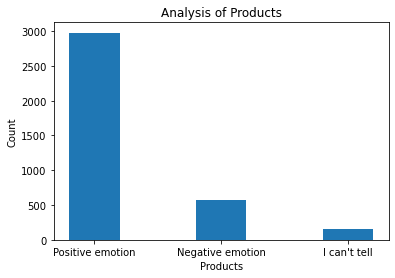

In [335]:
plt.bar(temp.index,temp,width = 0.4)
plt.title("Analysis of Products")
plt.xlabel("Products")
plt.ylabel("Count")

In [336]:
from sklearn.preprocessing import LabelEncoder

In [337]:
labelencoder = LabelEncoder()
df['is_there_an_emotion_directed_at_a_brand_or_product_int'] = labelencoder.fit_transform(df['is_there_an_emotion_directed_at_a_brand_or_product'])
# df['emotion_in_tweet_is_directed_at_int'] = labelencoder.fit_transform(df['emotion_in_tweet_is_directed_at'])

<ipython-input-337-587f605b174a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_there_an_emotion_directed_at_a_brand_or_product_int'] = labelencoder.fit_transform(df['is_there_an_emotion_directed_at_a_brand_or_product'])


In [338]:
df = df.replace('[^a-zA-Z]', ' ', regex = True)

In [339]:
df = df.replace('https* | www*',' ',regex = True)

In [340]:
df = df.replace('\s+',' ',regex = True)

In [341]:
# Lower all the text.
df['tweet_text'] = df['tweet_text'].str.lower()
df['is_there_an_emotion_directed_at_a_brand_or_product'] = df['is_there_an_emotion_directed_at_a_brand_or_product'].str.lower()

In [342]:
df = df.loc[df['is_there_an_emotion_directed_at_a_brand_or_product'] != 'i can t tell',:]

In [343]:
df['tweet_text'][0]

' wesley i have a g iphone after hrs tweeting at rise austin it was dead i need to upgrade plugin stations at sxsw '

In [344]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\YASH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [345]:
ls = WordNetLemmatizer()

In [346]:
for i in df['tweet_text']:
    tweets = nltk.word_tokenize(i)
    tweets = [ls.lemmatize(word) for word in tweets if not word in set(stopwords.words('english'))]
    tweets = ' '.join(tweets)
    i = tweets

In [347]:
df.get(5)

In [348]:
df

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product,is_there_an_emotion_directed_at_a_brand_or_product_int
0,wesley i have a g iphone after hrs tweeting a...,negative emotion,1
1,jessedee know about fludapp awesome ipad ipho...,positive emotion,2
2,swonderlin can not wait for ipad also they sh...,positive emotion,2
3,sxsw i hope this year s festival isn t as cra...,negative emotion,1
4,sxtxstate great stuff on fri sxsw marissa may...,positive emotion,2
...,...,...,...
9077,mention your pr guy just convinced me to swit...,positive emotion,2
9079,quot papyrus sort of like the ipad quot nice ...,positive emotion,2
9080,diller says google tv quot might be run over b...,negative emotion,1
9085,i ve always used camera for my iphone b c it h...,positive emotion,2


In [349]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000)
X = cv.fit_transform(df['tweet_text']).toarray()

In [350]:
X.shape

(3548, 5000)

In [351]:
cv.get_feature_names()[:15]

['aapl',
 'abacus',
 'abandoned',
 'aber',
 'ability',
 'able',
 'about',
 'above',
 'abroad',
 'absolute',
 'absolutely',
 'abt',
 'abuzz',
 'academy',
 'acc']

In [352]:
y = df['is_there_an_emotion_directed_at_a_brand_or_product_int']

In [353]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [354]:
bog_represent = pd.DataFrame(X_train,columns = cv.get_feature_names())

In [355]:
bog_represent

,aapl,abacus,abandoned,aber,ability,able,about,above,abroad,absolute,...,zgd,zimride,zing,zip,zite,zms,zombies,zomg,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2834,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2835,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2836,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Implemented 3 Algorithms for classifying tweet as positive or negative
# 1. MultinomialNB Algorithm
# 2. Passive Aggressive Classifier Algorithm
# 3. Decision Tree Algorithm

# For each and every algorithm score and confusion matrix is calculated

In [356]:
# MultinomialNB Algorithm

In [357]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
mnb = MultinomialNB()

In [358]:
mnb.fit(X_train,y_train)
y_predicted = mnb.predict(X_test)
score = metrics.accuracy_score(y_test,y_predicted)
score*100

86.61971830985915

In [359]:
confusion_matrix = metrics.confusion_matrix(y_test,y_predicted)
confusion_matrix
# 1st col = Negative emotion
# 2nd col = Positive emotion

array([[ 41,  61],
       [ 34, 574]], dtype=int64)

In [360]:
# Passive Aggressive Classifier Algorithm

In [361]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier()

In [362]:
pac.fit(X_train,y_train)
y_predicted = pac.predict(X_test)
score = metrics.accuracy_score(y_test,y_predicted)
score*100

88.73239436619718

In [363]:
confusion_matrix = metrics.confusion_matrix(y_test,y_predicted)
confusion_matrix
# 1st col = Negative emotion
# 2nd col = Positive emotion

array([[ 56,  46],
       [ 34, 574]], dtype=int64)

In [364]:
# Decision Tree Algorithm

In [367]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [368]:
dtc.fit(X_train,y_train)
y_predicted = dtc.predict(X_test)
score = metrics.accuracy_score(y_test,y_predicted)
score*100

85.91549295774648

In [369]:
confusion_matrix = metrics.confusion_matrix(y_test,y_predicted)
confusion_matrix
# 1st col = Negative emotion
# 2nd col = Positive emotion

array([[ 40,  62],
       [ 38, 570]], dtype=int64)